<a href="https://colab.research.google.com/github/ttury/neutralization/blob/main/Chemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from matplotlib import pyplot as plt
import numpy as np

class Substance:
  def __init__(self, n, M, V, acidity, mole=None, spectatorion=1):
    self.n = n
    self.M = M
    self.V = V
    self.acidity = acidity
    self.spectatorion = spectatorion
    try:
      self.mole = M * V
    except:
      self.mole = mole
  
  def info(self):
    print('액성: {}'.format(self.acidity))
    print('가수: {}'.format(self.n))
    print('농도: {}'.format(self.M))
    print('부피: {}'.format(self.V))
    print('몰수: {}'.format(self.mole))

class Experiment:
  def __init__(self, acid, base):
    self.acid = acid
    self.base = base

  def info(self):
    print('----산 용액 정보----')
    self.acid.info()
    print('--------------------')
    print('---염기 용액 정보---')
    self.base.info()
    print('--------------------')
    print()

  def neutralization(self):
    self.water_mole = 0
    hydrogen_mole = self.acid.n * self.acid.mole
    hydroxide_mole = self.base.n * self.base.mole
    if hydrogen_mole > hydroxide_mole:
      self.water_mole = hydroxide_mole
      hydrogen_mole -= self.water_mole
      hydroxide_mole = 0
    else:
      self.water_mole = hydrogen_mole
      hydroxide_mole -= self.water_mole
      hydrogen_mole = 0
    self.result_H_mole = hydrogen_mole
    self.result_OH_mole = hydroxide_mole
  
  def ion_graph(self):
    print('염기 용액에 산 용액을 넣을 때의 이온 그래프')
    if self.water_mole > self.acid.mole: self.water_mole = self.acid_mole
    hydrogen_grad = self.acid.n
    hydroxide_grad = -(self.acid.n / self.base.n)
    acid_spec_grad = self.acid.spectatorion

    # 구경꾼 이온
    plt.plot([0, self.acid.mole], [0, self.acid.spectatorion * self.acid.mole], label='A-') # 산 구경꾼
    plt.plot([0, self.acid.mole], [self.base.spectatorion * self.base.mole, self.base.spectatorion * self.base.mole], label='B+')
    # 수산화 이온
    plt.plot([0, self.water_mole, self.acid.mole], [self.base.n * self.base.mole, self.result_OH_mole, self.result_OH_mole], label='OH-')
    # 수소 이온
    plt.plot([0, self.water_mole, self.acid.mole], [0, 0, self.result_H_mole], label='H+')
    
    plt.grid(True)
    plt.legend()
    plt.show()

In [95]:
'''
print('산의 가수: ', end=' ')
acid_n = int(input())
print('산의 농도: ', end=' ')
acid_M = float(input())
print('산의 부피: ', end=' ')
acid_V = float(input())
print('염기의 가수: ', end=' ')
base_n = int(input())
print('염기의 농도: ', end=' ')
base_M = float(input())
print('염기의 부피: ', end=' ')
base_V = float(input())
print()
'''
acid_n = 1
acid_M = 0.1
acid_V = 0.4
base_n = 2
base_M = 0.1
base_V = 0.1

acid = Substance(acid_n, acid_M, acid_V, '산성')
base = Substance(base_n, base_M, base_V, '염기성')
experiment = Experiment(acid, base)
experiment.info()

experiment.neutralization()
print(experiment.water_mole)

----산 용액 정보----
액성: 산성
가수: 1
농도: 0.1
부피: 0.4
몰수: 0.04000000000000001
--------------------
---염기 용액 정보---
액성: 염기성
가수: 2
농도: 0.1
부피: 0.1
몰수: 0.010000000000000002
--------------------

0.020000000000000004


염기 용액에 산 용액을 넣을 때의 이온 그래프


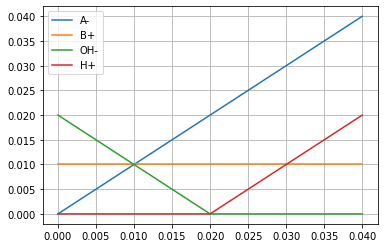

0


In [96]:
experiment.ion_graph()
print(experiment.result_OH_mole)